#Multiclass Classifcation
as we have done with binary classifcation we are going to built on it to move to multiclass classifcation



In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile('/content/10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2023-10-27 21:57:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.207, 209.85.145.207, 172.217.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   100MB/s    in 5.0s    

2023-10-27 21:57:13 (98.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/train'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


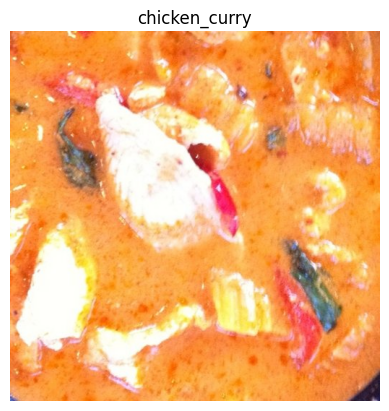

In [5]:
img=view_random_image("10_food_classes_all_data/train/",'chicken_curry')

Image shape: (306, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 382, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


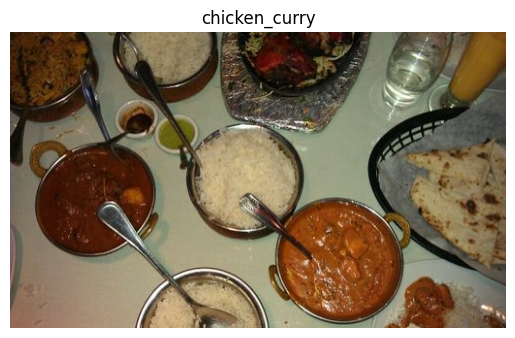

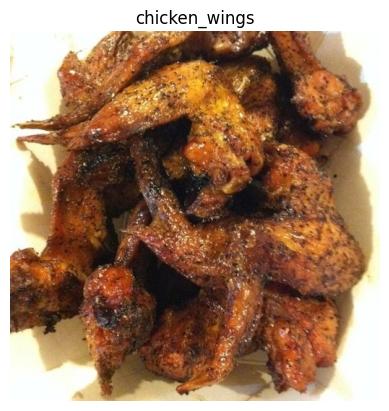

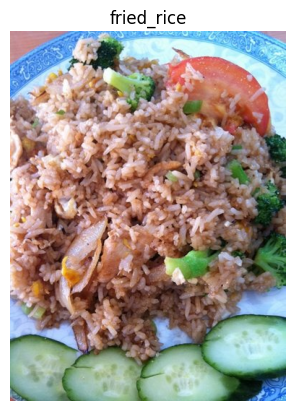

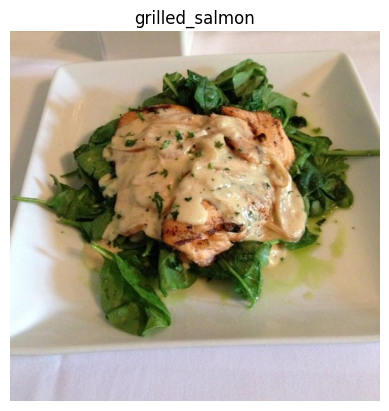

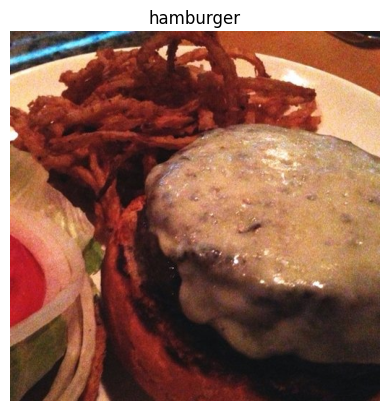

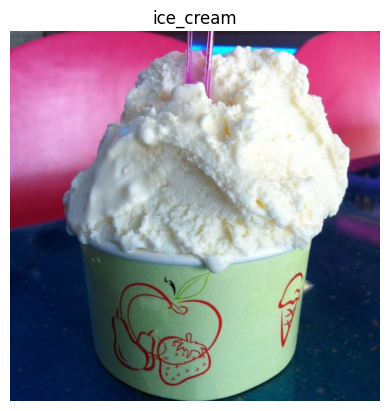

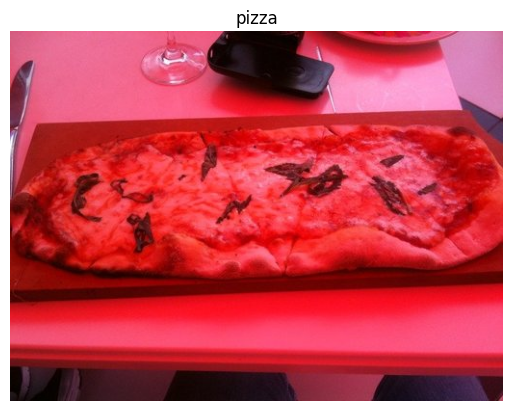

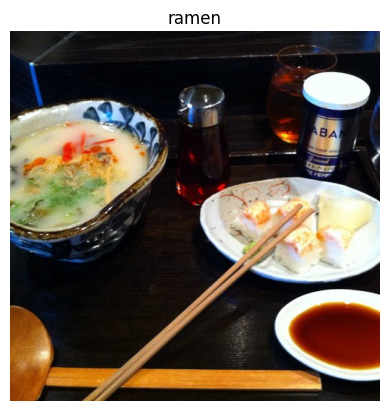

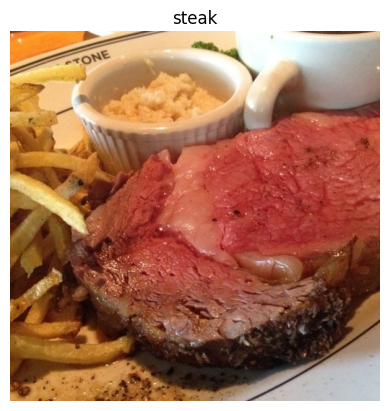

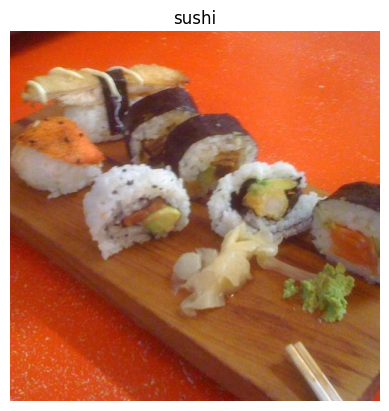

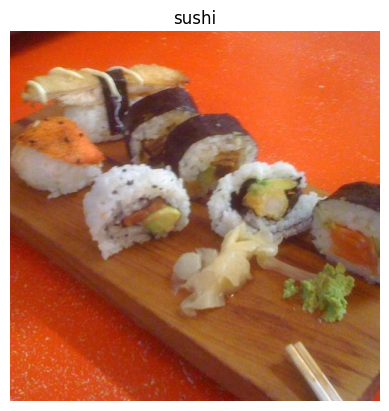

In [6]:
import matplotlib.pyplot as plt

food_images = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger',
              'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']

for food_label in food_images:
    img = view_random_image("10_food_classes_all_data/train/", food_label)
    plt.figure()  # Create a new figure for each label
    plt.title(food_label)  # Set the title as the food label
    plt.axis('off')  # Turn off axis labels and ticks
    plt.imshow(img)


#Preprocess the data
converting our data into tensors

In [7]:
import tensorflow as tf
from keras.src.metrics.probabilistic_metrics import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed = 42

#preprocees data to get all the pixel value between 0 and 1
train_datagen=ImageDataGenerator(rescale = 1./255)
#valid_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)


train_dir ="/content/10_food_classes_all_data/train/"
test_dir ="/content/10_food_classes_all_data/test/"

train_data =train_datagen.flow_from_directory(train_dir,target_size = (224,224),class_mode='categorical',batch_size = 32)# number of images to process at a time,convert all images to be 224 x 224,type of problem we're working on
#valid_data =valid_datagen.flow_from_directory(test_dir,batch_size = 32,target_size = (224,224),class_mode='categorical',seed =42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#Building the Model

In [8]:
# simple CNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [9]:
from keras.src.backend import categorical_crossentropy
# 'create a model
model_1= Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_1= model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 135ms/step - loss: 2.1021 - accuracy: 0.2353 - val_loss: 1.9468 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.8714 - accuracy: 0.3507 - val_loss: 1.8508 - val_accuracy: 0.3636
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.7145 - accuracy: 0.4129 - val_loss: 1.8200 - val_accuracy: 0.3768
Epoch 4/5
235/235 [==============================] - 32s 138ms/step - loss: 1.5472 - accuracy: 0.4741 - val_loss: 1.8020 - val_accuracy: 0.3816
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 1.3670 - accuracy: 0.5384 - val_loss: 1.9052 - val_accuracy: 0.3604


#evaluate the model


In [10]:
model_1.predict(test_data)

79/79 [==============================] - 6s 78ms/step


array([[0.06029863, 0.07952117, 0.0620377 , ..., 0.05347017, 0.11640031,
        0.01218842],
       [0.09571289, 0.25739574, 0.05904124, ..., 0.01402806, 0.03042973,
        0.05340198],
       [0.22013283, 0.02132637, 0.10272474, ..., 0.02359801, 0.03668206,
        0.12296648],
       ...,
       [0.0221462 , 0.04113179, 0.10623457, ..., 0.10600423, 0.10285469,
        0.17747965],
       [0.00216541, 0.00992268, 0.02083227, ..., 0.00221504, 0.38040107,
        0.29587984],
       [0.02828991, 0.0662984 , 0.00761252, ..., 0.00486545, 0.48488244,
        0.00690334]], dtype=float32)

In [11]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

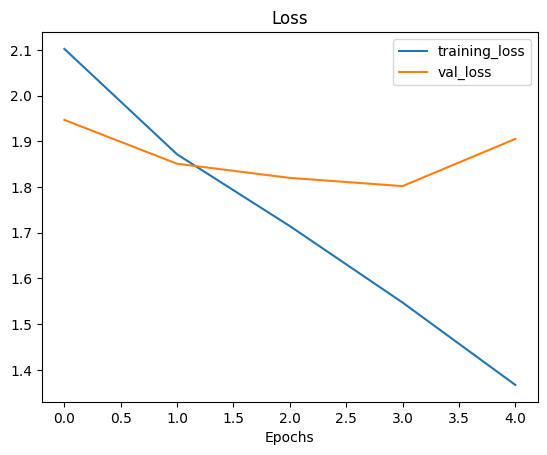

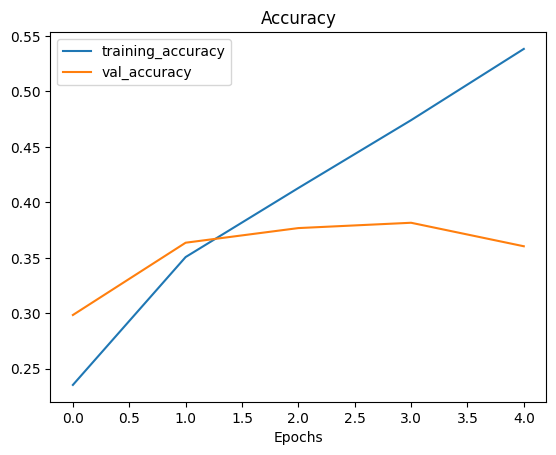

In [12]:
plot_loss_curves(history_1)

here we can see that the model is over fitting great results on trainging data but not good on test data ,so we will fix this.

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.


so we want to reduce overfittig or we are going to regulrisation

so the steps to imporove oevrfitting

Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [13]:
from keras.src.backend import categorical_crossentropy
# we are simplifng the model but we are removing two convolution layers
model_2= Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2= model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 118ms/step - loss: 2.1078 - accuracy: 0.2539 - val_loss: 1.9298 - val_accuracy: 0.3204
Epoch 2/5
235/235 [==============================] - 27s 117ms/step - loss: 1.7434 - accuracy: 0.4037 - val_loss: 1.8645 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 27s 116ms/step - loss: 1.4119 - accuracy: 0.5323 - val_loss: 1.9150 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 34s 143ms/step - loss: 0.9836 - accuracy: 0.6916 - val_loss: 2.1617 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 35s 148ms/step - loss: 0.5595 - accuracy: 0.8377 - val_loss: 2.4941 - val_accuracy: 0.3156


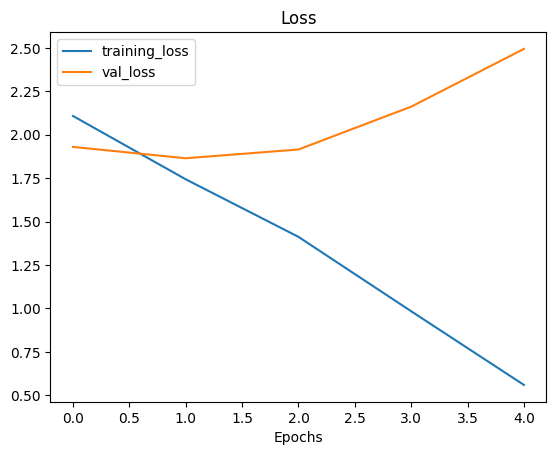

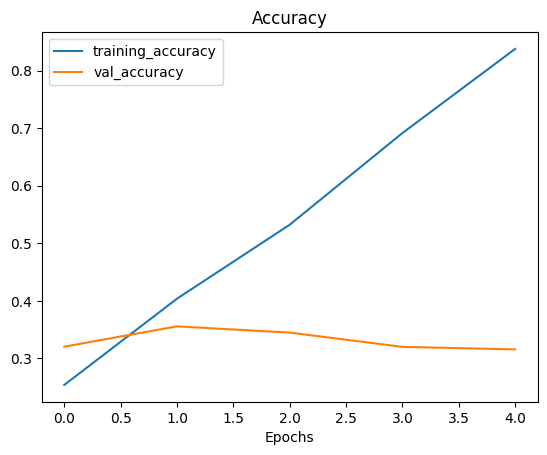

In [14]:
plot_loss_curves(history_2)

#data augmentation
to remove overfitting

In [15]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                            horizontal_flip=True) # flip the image on the horizontal axis

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format

In [16]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_1)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 105s 442ms/step - loss: 5.0746 - accuracy: 0.1039 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 2/5
235/235 [==============================] - 107s 457ms/step - loss: 2.3088 - accuracy: 0.1035 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 102s 433ms/step - loss: 2.2997 - accuracy: 0.1072 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 102s 436ms/step - loss: 2.2987 - accuracy: 0.1144 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 106s 453ms/step - loss: 2.2932 - accuracy: 0.1209 - val_loss: 2.3029 - val_accuracy: 0.0992


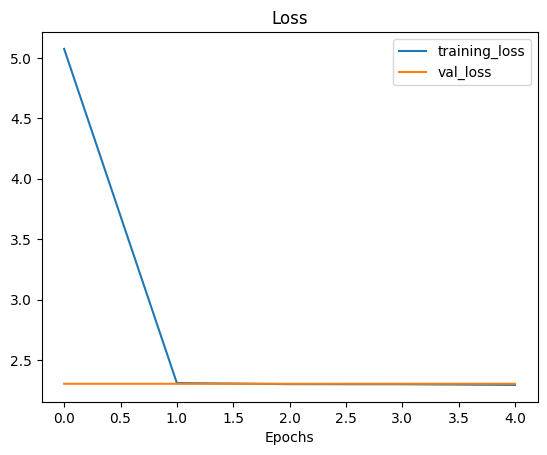

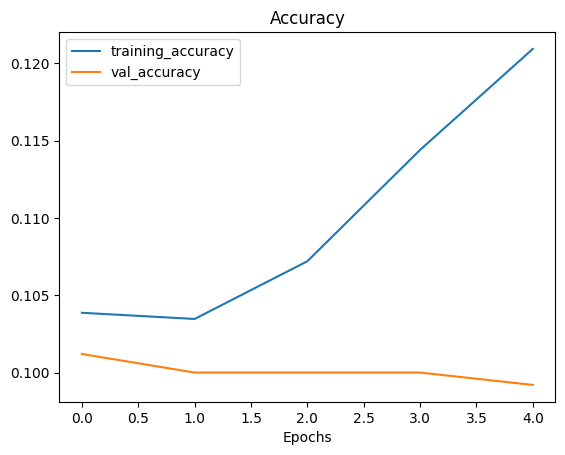

In [17]:
plot_loss_curves(history_3)

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

#Predict data


In [19]:
from PIL import Image
import numpy as np

def load_and_resize_image(image_path, target_shape=(224, 224, 3)):
    # Open the image using Pillow
    img = Image.open(image_path)

    # Resize the image to the target shape
    img = img.resize(target_shape[:2], Image.ANTIALIAS)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    return img_array


In [20]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_resize_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

<ipython-input-19-aefe2516592a>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_shape[:2], Image.ANTIALIAS)


1/1 [==============================] - 0s 181ms/step


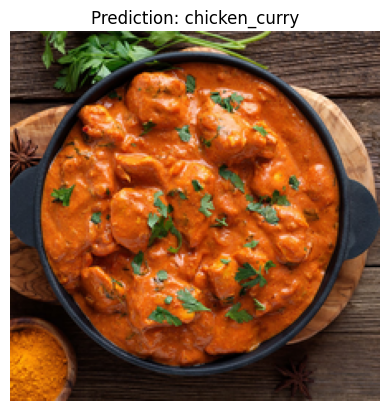

In [22]:
pred_and_plot(model_3,'/content/Chicken-Curry-recipe.jpg',class_names)

#Saving the data

In [23]:
model_3.save('saved_trained_model_3')

In [25]:
load_model_3 = tf.keras.models.load_model('saved_trained_model_3')

In [26]:
load_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

#Refrences
https://www.youtube.com/watch?v=uapdILWYTzE&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=4